<a href="https://colab.research.google.com/github/simonvelezt/Analitica/blob/main/V2_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial - Simon Velez Tamayo

1. Naive bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from itertools import count
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder


nxl='/content/drive/MyDrive/ANALISIS DE DATOS/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl)
XDB.dropna(inplace=True)
le = LabelEncoder()
XDB['Sex'] = le.fit_transform(XDB['Sex'])
XD=np.array(XDB[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']])
yd=np.array(XDB['Grad'])
print(XDB)

Magnitud = len(XDB)
print("Magnitud de la base de datos es de: ", Magnitud)

XDB_graduados = np.where(yd==1)[0]
len(XDB_graduados)
pct_graduados=len(XDB_graduados)/Magnitud*100
print("porcentage de personas graduadas es de: ", pct_graduados, "%")

XDB_nograduados = np.where(yd==0)[0]
len(XDB_nograduados)
pct_nograduados=len(XDB_nograduados)/Magnitud*100
print("porcentage de personas no graduadas es de: ", pct_nograduados, "%")

XDB.head(100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Sex  White  HS GPA   SAT    GPA  College Parent  Grad
0       0      1    4.14  1410  2.949               1     1
1       1      1    3.30  1260  2.789               1     1
2       0      0    4.30   950  2.851               0     1
3       1      1    4.29  1290  3.533               1     1
4       0      1    4.20  1350  3.301               1     1
...   ...    ...     ...   ...    ...             ...   ...
1995    1      1    3.18  1400  3.118               1     1
1996    1      0    3.82  1230  2.640               1     0
1997    0      0    3.74  1140  2.283               0     0
1998    1      1    3.75  1260  3.193               1     1
1999    1      0    3.08   950  2.090               0     0

[2000 rows x 7 columns]
Magnitud de la base de datos es de:  2000
porcentage de personas graduadas es de:  69.19999999999999 %
porcentage de personas 

,Sex,White,HS GPA,SAT,GPA,College Parent,Grad
0,0,1,4.14,1410,2.949,1,1
1,1,1,3.30,1260,2.789,1,1
2,0,0,4.30,950,2.851,0,1
3,1,1,4.29,1290,3.533,1,1
4,0,1,4.20,1350,3.301,1,1
...,...,...,...,...,...,...,...
95,0,1,3.81,1340,2.884,0,1
96,0,1,4.23,1490,3.861,0,1
97,0,1,4.14,1410,3.738,0,1
98,0,1,4.20,1280,3.650,0,1


In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)

u=mnb.theta_
sigma=np.sqrt(mnb.var_)
LI=u-sigma
LS=u+sigma

print("media que tiene las variables por categoria:",u)
print(u)
print("limite inferior de la variación de las variables por categoría",LI)
print(LI)
print("limite superior de la variación de las variables por categoría",LS)
print(LS)

cm=confusion_matrix(yd,ydp)
print("La matriz de confusión")
print(cm)


media que tiene las variables por categoria: [[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
[[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
limite inferior de la variación de las variables por categoría [[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
[[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
limite superior de la variación de las variables por categoría [[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]
[[1.07860152e+00 4.08635

In [ ]:
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/len(XD)
print("La Exactitud es", Exactitud)

TE=(FN+FP)/len(XD)
print("La Tasa de Error es", TE)

Sensibilidad=VP/(VP+FN)
print("La Sensibilidad es", Sensibilidad)

Especificidad=VN/(VN+FP)
print("La Especifidad es", Especificidad)


PredNeg=VN/(VN+FP)
print("La Probabilidad de Negativo es", PredNeg)

Xun1=np.array([[1,4,1260,1.9,1]])
ydun1=mnb.predict(Xun1)
print("la categoria a la que pertenece la persona 1 es:",ydun1)

Xun2=np.array([[1,2.91,1090,2.719,1]])
ydun2=mnb.predict(Xun2)
print("la categoria a la que pertenece la persona 2 es:",ydun2)

Xun3=np.array([[0,3.58,1210,3.319,1]])
ydun3=mnb.predict(Xun3)
print("la categoria a la que pertenece la persona 2 es:",ydun3)



La Exactitud es 0.867
La Tasa de Error es 0.133
La Sensibilidad es 0.9263005780346821
La Especifidad es 0.7337662337662337
La Probabilidad de Negativo es 0.7337662337662337
la categoria a la que pertenece la persona 1 es: [0]
la categoria a la que pertenece la persona 2 es: [0]
la categoria a la que pertenece la persona 2 es: [1]


2. arbol de desicion

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

mar= DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)
ydp2 = mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(yd,ydp2)
print(cm2)

VN1=cm2[0,0]
FP1=cm2[0,1]
FN1=cm2[1,0]
VP1=cm2[1,1]

exactitud=(VP1+VN1)/(VP1+VN1+FP1+FN1)
print( "La exactitud es:",exactitud)

sensibilidad=VP1/(VP1+FN1)
print( "La sensibilidad es:",sensibilidad)

especificidad=VN1/(VN1+FP1)
print( "La especificidad es:",especificidad)

[[ 422  194]
 [   2 1382]]
La exactitud es: 0.902
La sensibilidad es: 0.9985549132947977
La especificidad es: 0.685064935064935


In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs= ['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

3. KNmeans

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


esta es la matriz de correlacion:
                      Sex     White    HS GPA       SAT       GPA  \
Sex             1.000000 -0.029289 -0.030116  0.171818 -0.171945   
White          -0.029289  1.000000  0.130981  0.191930  0.194132   
HS GPA         -0.030116  0.130981  1.000000  0.346767  0.376932   
SAT             0.171818  0.191930  0.346767  1.000000  0.260927   
GPA            -0.171945  0.194132  0.376932  0.260927  1.000000   
College Parent  0.021320 -0.005987  0.020068 -0.029768 -0.015137   
Grad           -0.163517  0.133612  0.283404  0.172794  0.726624   

                College Parent      Grad  
Sex                   0.021320 -0.163517  
White                -0.005987  0.133612  
HS GPA                0.020068  0.283404  
SAT                  -0.029768  0.172794  
GPA                  -0.015137  0.726624  
College Parent        1.000000 -0.018035  
Grad                 -0.018035  1.000000  


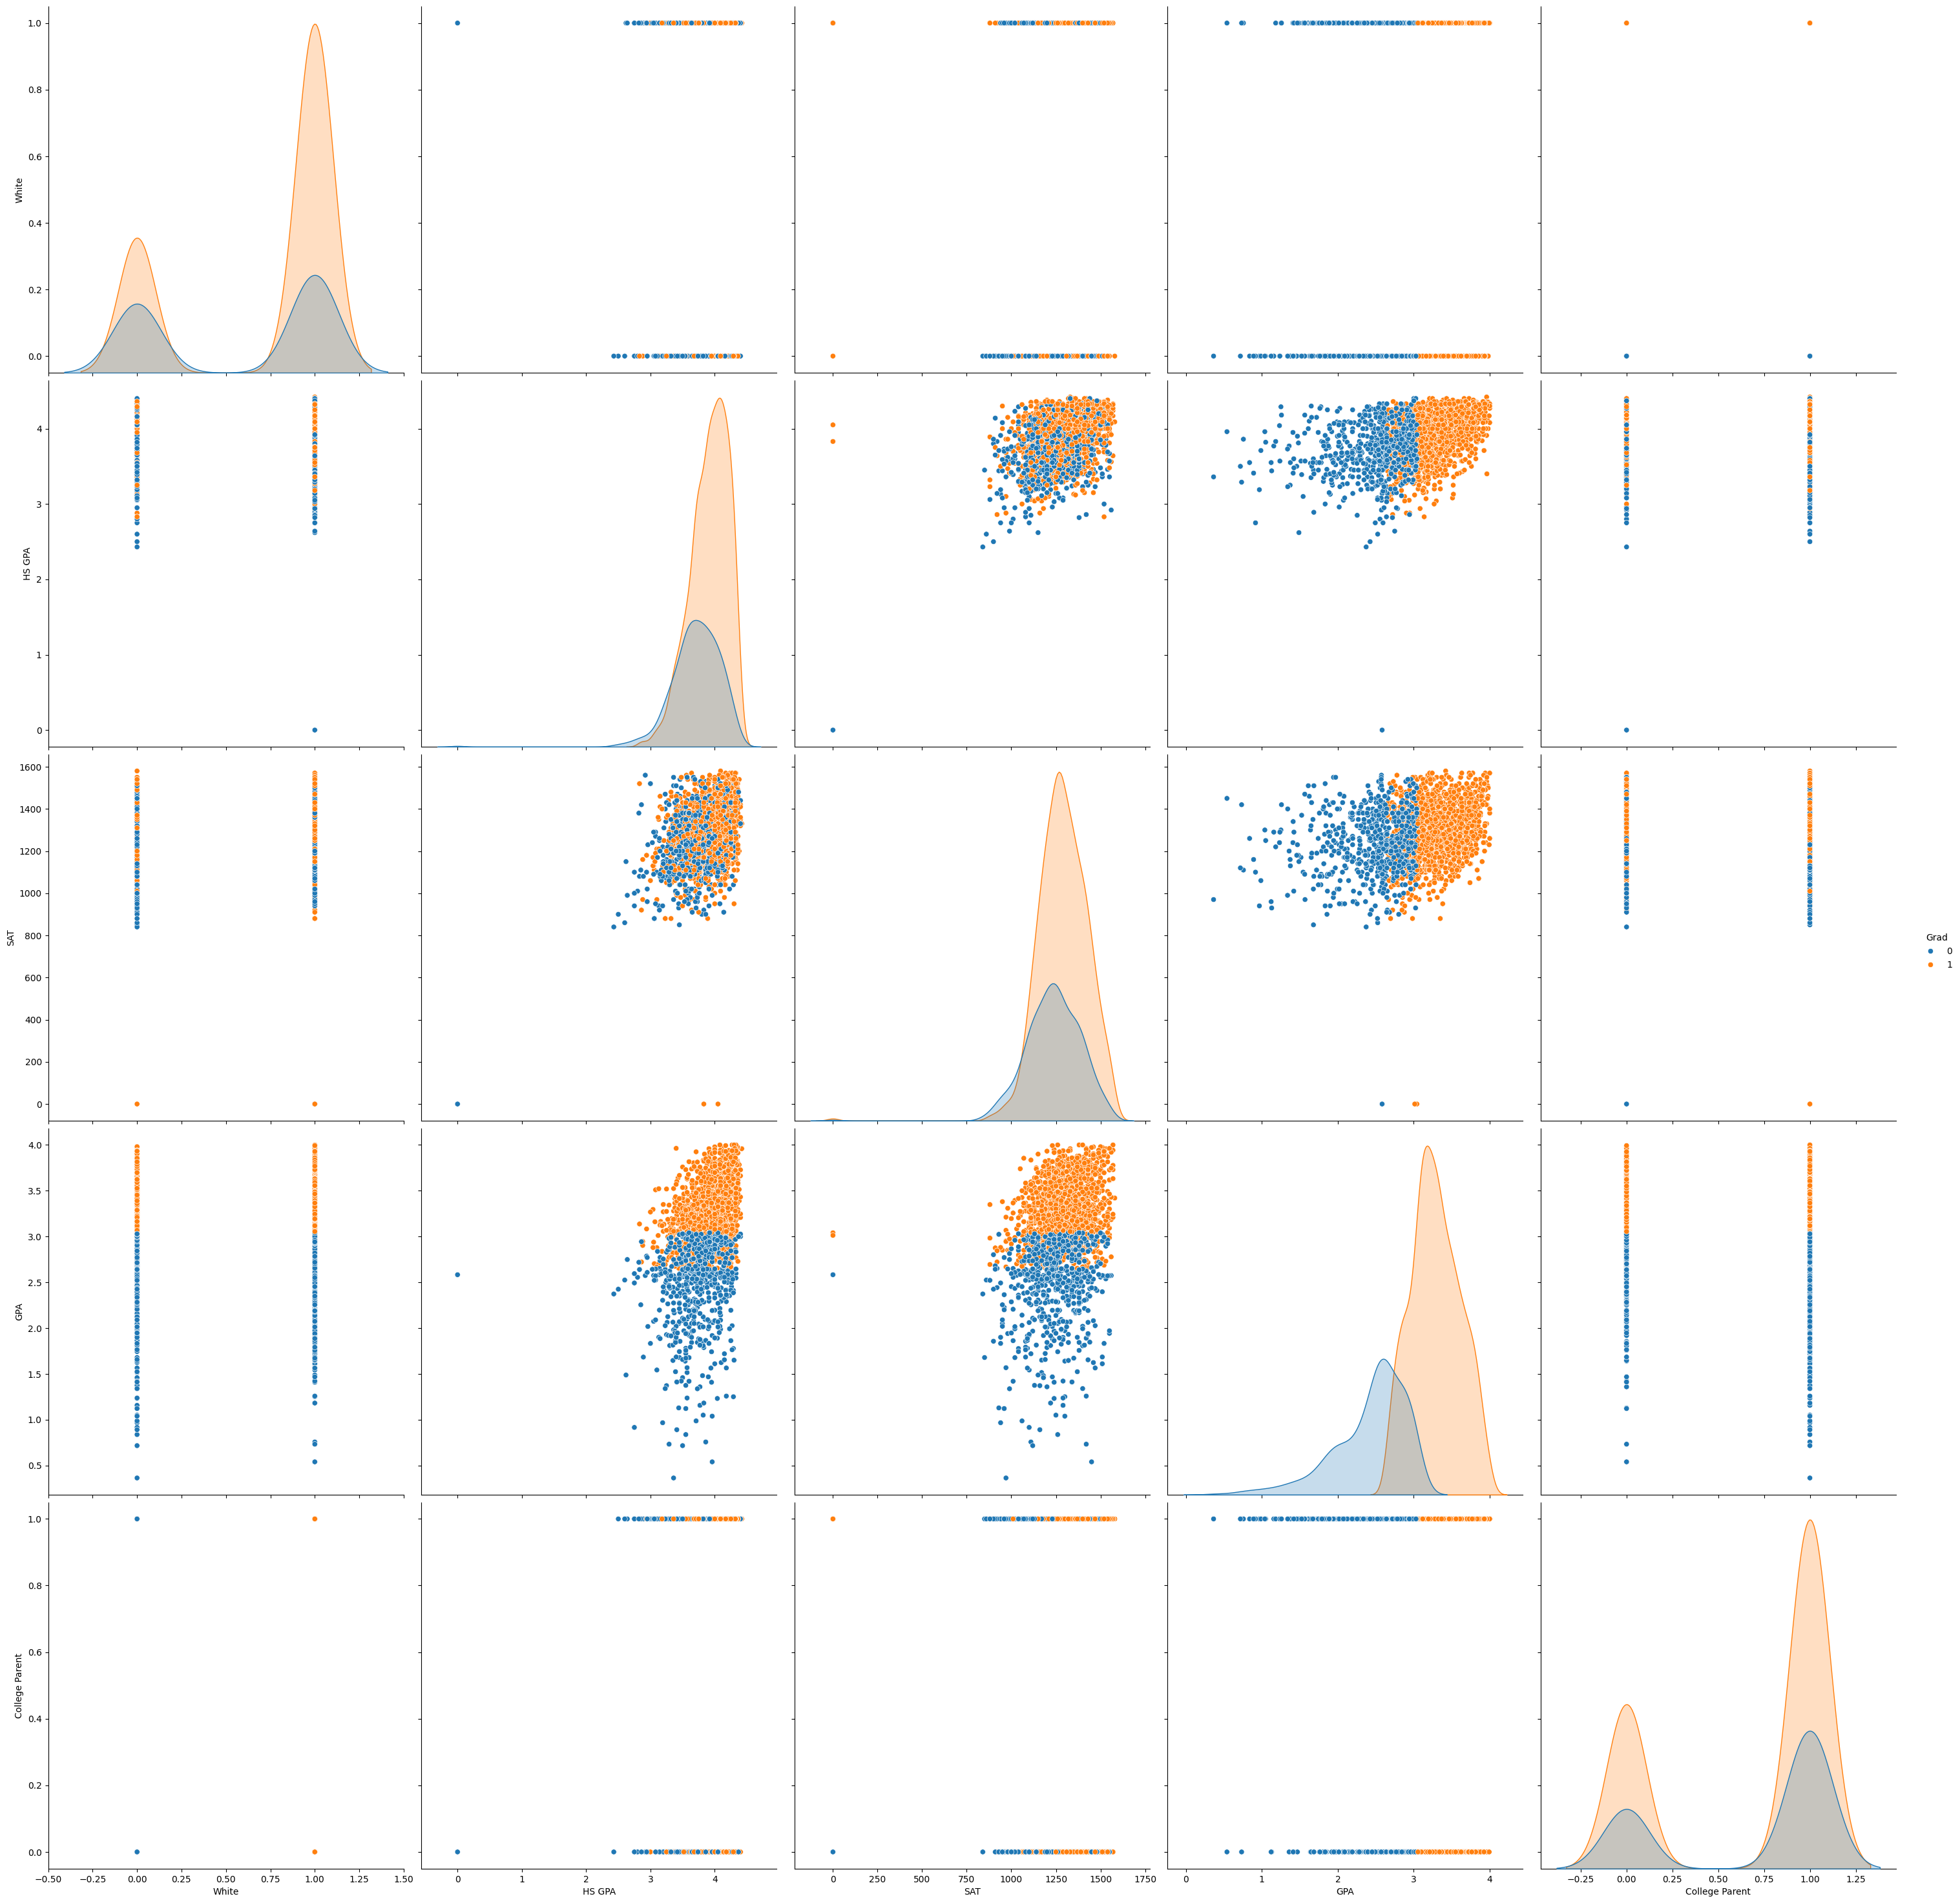

In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

sns.pairplot(XDB,hue='Grad',size=6,vars=['White', 'HS GPA', 'SAT', 'GPA', 'College Parent'])

corr=XDB.corr()
print("esta es la matriz de correlacion:\n",corr)

XD3=np.array(XDB.iloc[:,1:6])
YD3=np.array(XDB.iloc[:,6])


In [ ]:
np.random.seed (42)

#crear con 5 clusters

mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD3,YD3)
labels=mkm.labels_
print('el primer estudiante quedo en',labels[0,])
print('el segundo estudiante quedo en',labels[1,])
print('el tercer estudiante quedo en',labels[2,])
print('el cuarto estudiante quedo en',labels[3,])


el primer estudiante quedo en 2
el segundo estudiante quedo en 3
el tercer estudiante quedo en 0
el cuarto estudiante quedo en 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
XDP2=np.array([[1,4,1260,1.9,1]])
YDP2=np.array(mkm.predict(XDP2))
print('el primer estudiante quedo en',YDP2)

XDP3=np.array([[1,2.9,1090,2.719,1]])
YDP3=np.array(mkm.predict(XDP3))
print('el segundo estudiante quedo en',YDP3)

XDP4=np.array([[0,3.58,1210,3.319,1]])
YDP4=np.array(mkm.predict(XDP4))
print('el tercer estudiante quedo en',YDP4)

el primer estudiante quedo en [3]
el segundo estudiante quedo en [0]
el tercer estudiante quedo en [1]


In [ ]:

# Cluster 0
c0 = len(np.where((labels == 0) & (YD3== 0))[0])
c01 = len(np.where((labels == 0) & (YD3== 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 0:', c01)
print("El porcentaje de que logra su grado en 4 años para el cluster 0 es:", round(c01 / (c0 + c01) * 100, 2), '%')

# Cluster 1
c10 = len(np.where((labels == 1) & (YD3== 0))[0])
c11 = len(np.where((labels == 1) & (YD3== 1))[0])

print('logran graduarse en 4 años en el cluster 1:', c11)
print("porcentaje de que logra su grado en 4 años para el cluster 1 es:", round(c11 / (c10 + c11) * 100, 2), '%')

# Cluster 2
c20 = len(np.where((labels == 2) & (YD3 == 0))[0])
c21 = len(np.where((labels == 2) & (YD3== 1))[0])

print('logran graduarse en 4 años en el cluster 2:', c21)
print("porcentaje de que logra su grado en 4 años para el cluster 2 es:", round(c21 / (c20 + c21) * 100, 2), '%')

# Cluster 3
c30 = len(np.where((labels == 3) & (YD3== 0))[0])
c31 = len(np.where((labels == 3) & (YD3== 1))[0])

print('logran graduarse en 4 años en el cluster 3:', c31)
print("porcentaje de que logra su grado en 4 años para el cluster 3 es:", round(c31 / (c30 + c31) * 100, 2), '%')

#cluster 4

c40 = len(np.where((labels == 4) & (YD3== 0))[0])
c41 = len(np.where((labels == 4) & (YD3== 1))[0])

print('logran graduarse en 4 años en el cluster 4:', c41)
print("porcentaje de que logra su grado en 4 años para el cluster 4 es:", round(c41 / (c40 + c41)*100,2),'%')



Cantidad de estudiantes que logran graduarse en 4 años en el cluster 0: 131
El porcentaje de que logra su grado en 4 años para el cluster 0 es: 48.7 %
logran graduarse en 4 años en el cluster 1: 371
porcentaje de que logra su grado en 4 años para el cluster 1 es: 66.97 %
logran graduarse en 4 años en el cluster 2: 370
porcentaje de que logra su grado en 4 años para el cluster 2 es: 75.82 %
logran graduarse en 4 años en el cluster 3: 510
porcentaje de que logra su grado en 4 años para el cluster 3 es: 74.34 %
logran graduarse en 4 años en el cluster 4: 2
porcentaje de que logra su grado en 4 años para el cluster 4 es: 66.67 %


In [ ]:
np.set_printoptions(suppress=True)
clusters=mkm.cluster_centers_
print("cada cluster tiene esta caracteristica sociodemografica:\n",clusters)

cada cluster tiene esta caracteristica sociodemografica:
 [[   0.46468401    3.63951673 1053.12267658    2.7050855     0.73234201]
 [   0.64079422    3.80368231 1190.72202166    2.97076354    0.68592058]
 [   0.77254098    3.96206967 1446.82377049    3.16286475    0.65983607]
 [   0.72886297    3.90004373 1304.69387755    3.09267201    0.6851312 ]
 [   0.66666667    2.62666667    0.            2.879         0.66666667]]


In [ ]:
cluster_counts = np.bincount(labels)

max_HS_GPA_cluster = np.argmax(clusters[:1])
Max_GPA_cluster = np.argmax(clusters[:3])

for i,count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} estudiantes")

print(f"Cluster con la mayor HS GPA: {max_HS_GPA_cluster}")
print(f"Cluster con la mayor GPA: {Max_GPA_cluster}")

Cluster 0: 269 estudiantes
Cluster 1: 554 estudiantes
Cluster 2: 488 estudiantes
Cluster 3: 686 estudiantes
Cluster 4: 3 estudiantes
Cluster con la mayor HS GPA: 2
Cluster con la mayor GPA: 12


**Analisis:**

Se implementaron tres modelos de clasificación: Naive Bayes, Árbol de Decisión y K-Means, para predecir si una persona se graduará en cuatro años. Las variables de entrada utilizadas fueron: 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent' y la variable de salida fue 'Grad'.

La matriz de correlación muestra que las variables con mayor correlación con 'Grad' (variable de salida) son 'GPA' y 'Grad', con un coeficiente de 0.73. Las variables con mayor correlación entre ellas son 'HS GPA' y 'GPA', con un coeficiente de 0.38.

Modelo Naive Bayes: El grupo con la mayor calificación en 'HS GPA' corresponde a las personas que se graduaron (1), al igual que en el caso del promedio de la universidad ('GPA'). La exactitud del modelo es de 0.88, lo que indica una alta eficiencia. La sensibilidad es de 0.93, lo que refleja una gran capacidad para identificar a los graduados. La especificidad es de 0.75, mostrando que el modelo no es tan eficiente para identificar a las personas que no se graduarán. Según el modelo, los individuos 1 y 2 están en la categoría de no graduados, mientras que el individuo 3 está en la categoría de graduados.

Modelo de Árbol de Decisión: El modelo tiene una exactitud de 0.90, superior a la del modelo Naive Bayes, lo que indica que tiene un mayor potencial para ofrecer resultados precisos. La sensibilidad alcanzó casi el 100%, superando la del modelo Naive Bayes, demostrando así una gran capacidad para identificar a los graduados. Sin embargo, la especificidad es de 0.69, lo que indica una menor capacidad para identificar a los no graduados.

por ultimo se crearon 5 clusters siendo el segundo el que mustra que los alumnos tienen mas posibilidad de graduarse en 4 años con un 75.82%

